In [456]:
import pandas as pd
import random as rnd
import time

NUMERO_DE_FILMES=25

SAMPLE_PORCENTAGEM = 5

PALETTE_AZUL="Blues_r"
PALETTE_CUBEHELIX="cubehelix"
PALETTE_VERDE_AZUL="GnBu_r"
PALETTE_AZUL_VERDE="BuGn_r"
PALETTE_GELO_FOGO="icefire"

#arquivos IMDB
notas_filename = "title.ratings.tsv"    
filmes_filename = "title.akas.tsv"  


In [457]:
start = time.process_time()

# cria um sample do arquivo de notas (avaliações)
notas_df = pd.read_csv(
         notas_filename,
         header=0, 
         skiprows=lambda i: i>0 and rnd .random() > (SAMPLE_PORCENTAGEM/100),
         sep='\t'
)
notas_df.columns = ["filmeId", "notaMedia", "totalVotos"]

print("Tempo gasto: %s segundos" % (time.process_time() - start))

notas_df 

Tempo gasto: 0.2905240950000234 segundos


,filmeId,notaMedia,totalVotos
0,tt0000038,4.1,145
1,tt0000059,3.5,13
2,tt0000076,4.5,419
3,tt0000081,4.2,13
4,tt0000091,6.7,2653
...,...,...,...
51419,tt9913618,7.2,13
51420,tt9913936,8.3,16
51421,tt9914254,7.8,6
51422,tt9914746,9.7,6


In [458]:
notas_df["totalVotos"].describe()

count    5.142400e+04
mean     9.957585e+02
std      1.692079e+04
min      5.000000e+00
25%      9.000000e+00
50%      2.000000e+01
75%      8.000000e+01
max      1.424362e+06
Name: totalVotos, dtype: float64

In [459]:
start = time.process_time()
  
types = {'titleId':str,'title':str,'region':str,'language':str,'types':str,'attributes':str,'isOriginalTitle':str}

# cria um sample do arquivo de filmes (avaliações)
filmes_df = pd.read_csv(
         filmes_filename,
         dtype=types,
         header=0, 
         skiprows=lambda i: i>0 and rnd .random() > (SAMPLE_PORCENTAGEM/100),
         sep='\t'
)

filmes_orig_df = filmes_df.query("isOriginalTitle=='1' & types=='original'")
filmes_reduzido_df = filmes_orig_df.query("isOriginalTitle=='1'").drop(columns=['ordering', 'isOriginalTitle','types','attributes'])
filmes_reduzido_df.columns = ["filmeId", "titulo", "regiao","idioma"]

print("Tempo gasto: %s segundos" % (time.process_time() - start))

filmes_reduzido_df

Tempo gasto: 7.803069953000033 segundos


,filmeId,titulo,regiao,idioma
4,tt0000011,Akrobatisches Potpourri,\N,\N
10,tt0000030,Rough Sea at Dover,\N,\N
13,tt0000041,Bataille de neige,\N,\N
21,tt0000078,Feira de Gado na Corujeira,\N,\N
24,tt0000105,Les quais à Marseille,\N,\N
...,...,...,...,...
1070127,tt9909704,Bôkan hanayome o okasu,\N,\N
1070129,tt9909728,Joshi gakusei o shibaru,\N,\N
1070725,tt9915436,Vida em Movimento,\N,\N
1070734,tt9915520,Fascism i en svart bil,\N,\N


In [460]:
start = time.process_time()

filmes_completo = filmes_reduzido_df.set_index('filmeId').join(notas_df.set_index('filmeId'))
filmes_completo

print("Tempo gasto: %s segundos" % (time.process_time() - start))

Tempo gasto: 0.14432294400000956 segundos


0        4.1
1        3.5
2        4.5
3        4.2
4        6.7
        ... 
51419    7.2
51420    8.3
51421    7.8
51422    9.7
51423    7.3
Name: notaMedia, Length: 51424, dtype: float64
Tempo gasto: 0.03915738900002452 segundos


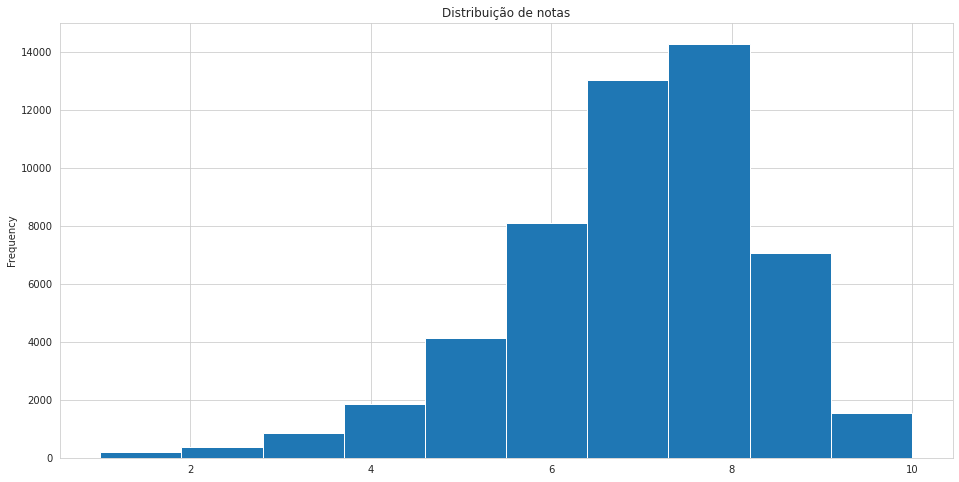

In [461]:
start = time.process_time()

notas_inteiras = notas_df.notaMedia 
print(notas_inteiras)
plt.figure(figsize=(16,8))
plt.title("Distribuição de notas")
notas_inteiras.plot(kind="hist")

print("Tempo gasto: %s segundos" % (time.process_time() - start))

In [462]:
import seaborn as sns
#
# função para plotar barras
#
def plot_barrar(titulo,total_de_barras,dataframe,palette,eixo_x,eixo_y):
  # estilo   
  sns.set_style("whitegrid")
  # tamanho do grafico
  plt.figure(figsize=(16,8))
  # titulo
  plt.title(titulo)
  plt.grid(True)
  # descreve os nomes do eixo y  
  plt.xticks(rotation=45, horizontalalignment='right')
  # desenha o gráfico  
  sns.barplot(x=eixo_x,
              y=eixo_y,
              palette=sns.color_palette(palette, n_colors=len(dataframe) + 4))
  return dataframe

Tempo gasto: 0.061162296999953014 segundos


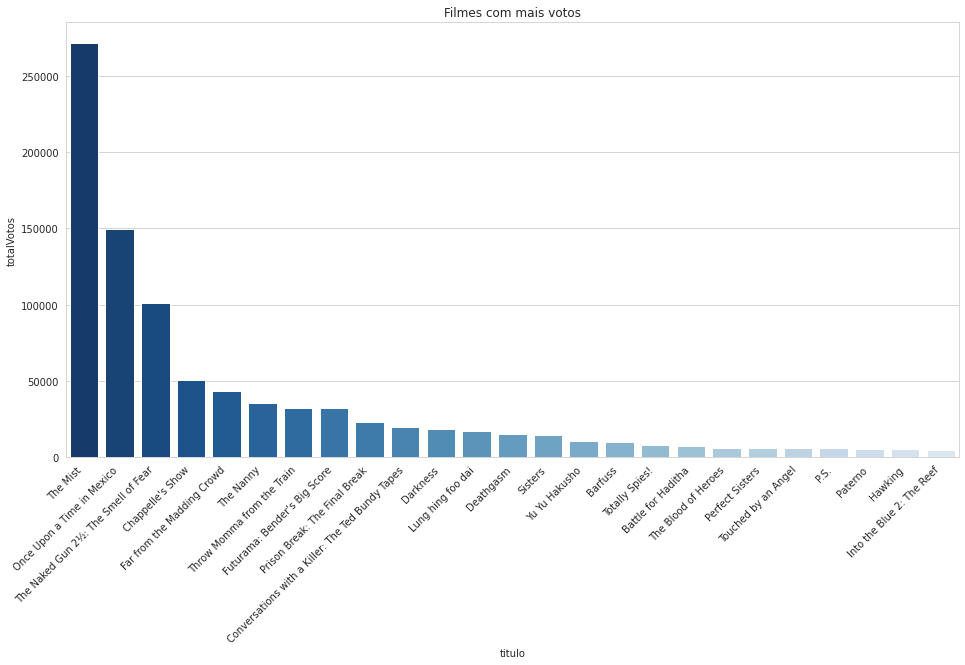

In [463]:
start = time.process_time()

votos_validos_df = filmes_completo[["titulo","totalVotos"]]
top_votos_validos_df = votos_validos_df.nlargest(NUMERO_DE_FILMES,"totalVotos")

plot_barrar("Filmes com mais votos",
            NUMERO_DE_FILMES,
            top_votos_validos_df,
            PALETTE_AZUL,
            top_votos_validos_df.titulo.astype(str),
            top_votos_validos_df.totalVotos.astype(int))

print("Tempo gasto: %s segundos" % (time.process_time() - start))

Tempo gasto: 0.06184547099996962 segundos


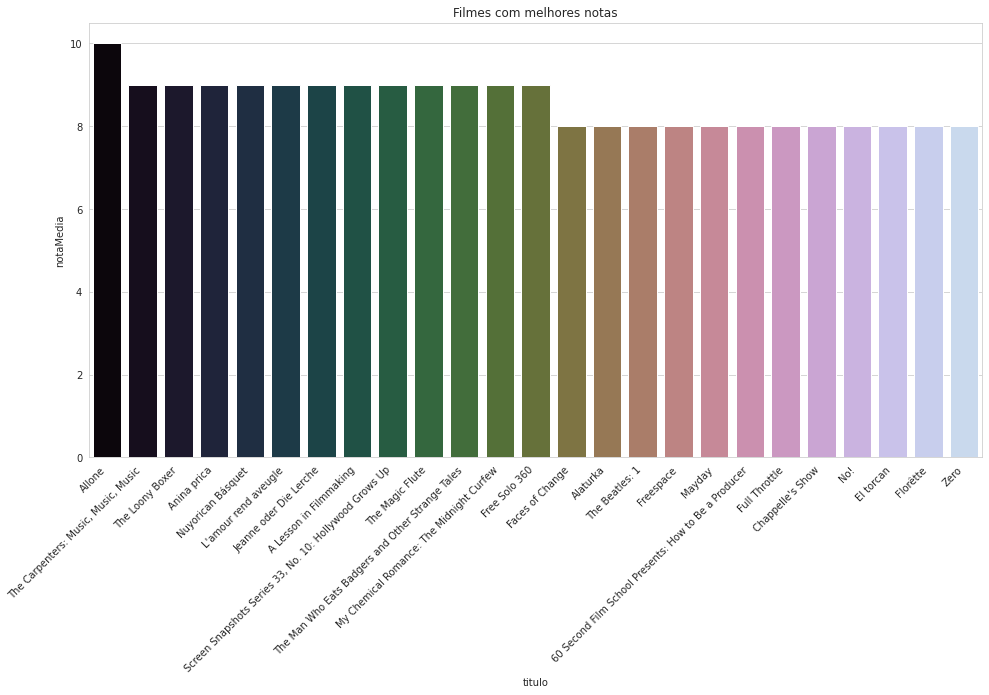

In [464]:
start = time.process_time()

votos_validos_media_df = filmes_completo[["titulo","notaMedia"]]
top_votos_validos_media_df = votos_validos_media_df.nlargest(NUMERO_DE_FILMES,"notaMedia")

plot_barrar("Filmes com melhores notas",
            NUMERO_DE_FILMES,
            top_votos_validos_media_df,
            PALETTE_CUBEHELIX,
            top_votos_validos_media_df.titulo.astype(str),
            top_votos_validos_media_df.notaMedia.astype(int))

print("Tempo gasto: %s segundos" % (time.process_time() - start))

Tempo gasto: 0.5113864950000107 segundos


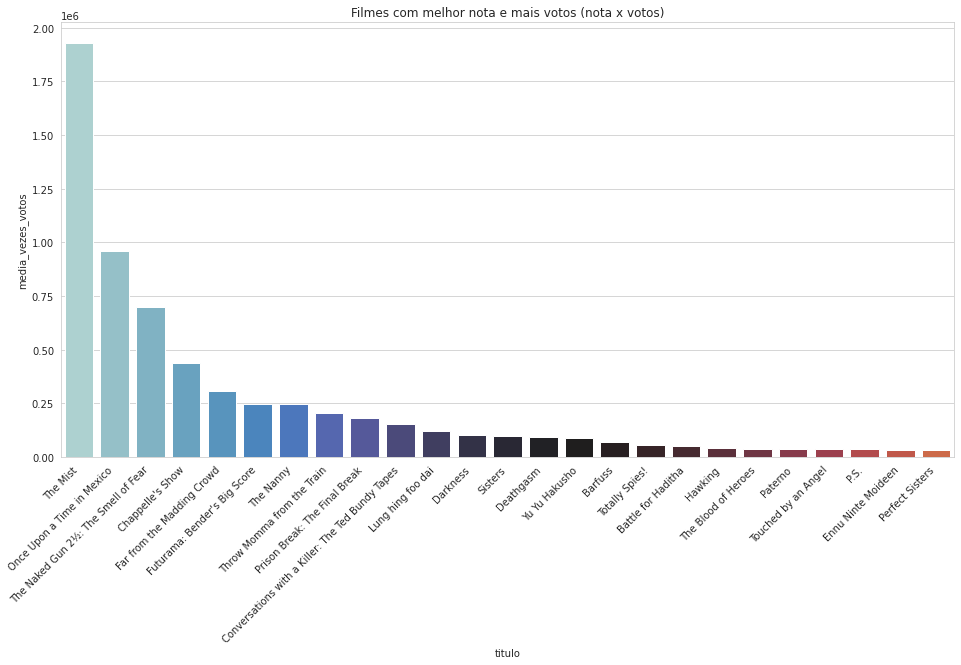

In [465]:
start = time.process_time()

votos_validos_media_df = filmes_completo.loc[:, ('titulo', 'notaMedia', 'totalVotos')] 
votos_validos_media_df['media_vezes_votos'] = votos_validos_media_df.apply(lambda row: row.notaMedia * row.totalVotos, axis = 1) 
top_votos_validos_media_df = votos_validos_media_df.nlargest(NUMERO_DE_FILMES,"media_vezes_votos")

plot_barrar("Filmes com melhor nota e mais votos (nota x votos)",
            NUMERO_DE_FILMES,
            top_votos_validos_media_df,
            PALETTE_GELO_FOGO,
            top_votos_validos_media_df.titulo.astype(str),            
            top_votos_validos_media_df.media_vezes_votos.astype(int))

print("Tempo gasto: %s segundos" % (time.process_time() - start))

Tempo gasto: 0.7312803159999817 segundos


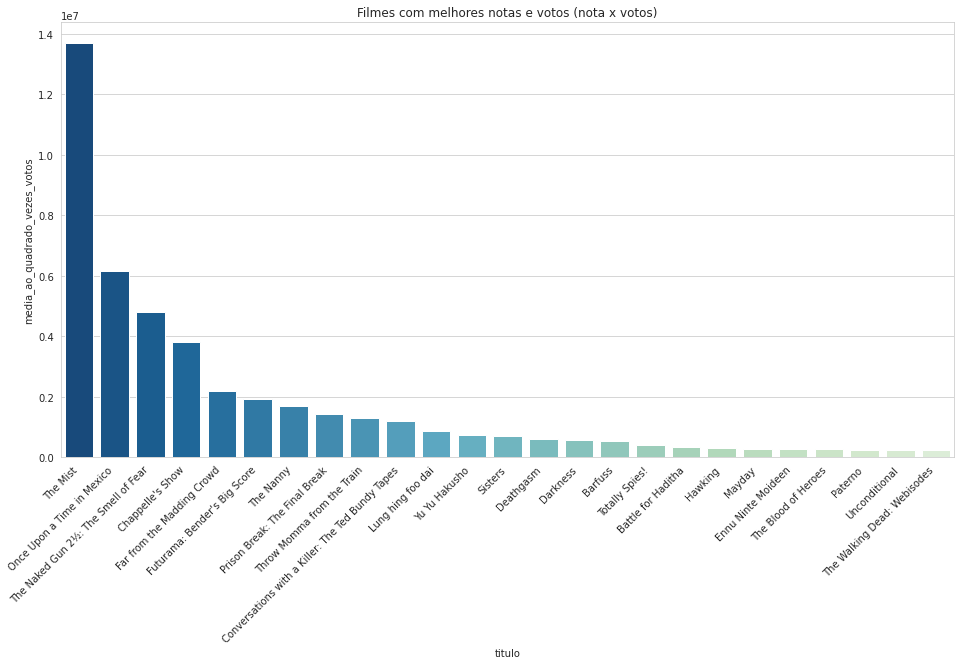

In [466]:
start = time.process_time()

votos_validos_media_qd_df = filmes_completo.loc[:,('titulo', 'notaMedia', 'totalVotos')] 
votos_validos_media_qd_df['media_ao_quadrado_vezes_votos'] = votos_validos_media_df.apply(lambda row: row.notaMedia * row.notaMedia * row.totalVotos, axis = 1) 
top_votos_validos_media_qd_df = votos_validos_media_qd_df.nlargest(NUMERO_DE_FILMES,"media_ao_quadrado_vezes_votos")

plot_barrar("Filmes com melhores notas e votos (nota x votos)",
            NUMERO_DE_FILMES,
            top_votos_validos_media_qd_df,
            PALETTE_VERDE_AZUL,
            top_votos_validos_media_qd_df.titulo.astype(str),
            top_votos_validos_media_qd_df.media_ao_quadrado_vezes_votos.astype(int))

print("Tempo gasto: %s segundos" % (time.process_time() - start))